In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tkinter import filedialog

In [73]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'planttypevalid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 4168 files belonging to 9 classes.
['Apple___healthy', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___healthy', 'Grape___healthy', 'Peach___healthy', 'Pepper,_bell___healthy', 'Potato___healthy', 'Strawberry___healthy', 'Tomato___healthy']


In [ ]:
MDL = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [74]:
validation_set2 = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set2.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [75]:

cnn = tf.keras.models.load_model('plant_type_model_00.h5')

In [76]:
cnn2 = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [ ]:
#Test Image Visualization
import cv2
image_path = filedialog.askopenfilename()
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)
predictions2 = cnn2.predict(input_arr)

In [70]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

result_index2 = np.argmax(predictions2) #Return index of max element
print(result_index2)

6
2


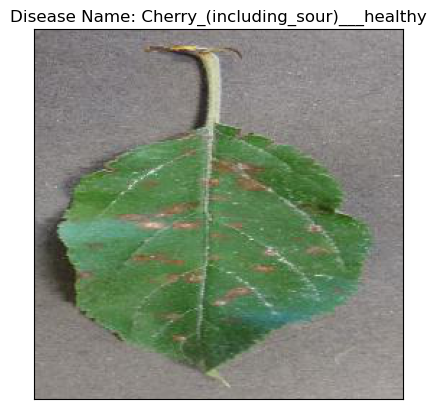

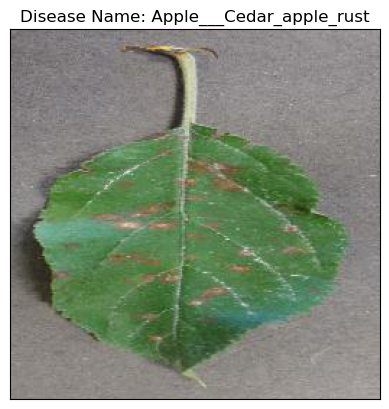

In [71]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

# Displaying the disease prediction
model_prediction = class_name[result_index2]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [59]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import tensorflow as tf
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('trained_plant_disease_model.keras')

# Define class names
# class_names = ['apple', 'strawberry', 'tomato']

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path)
    # Resize the image to the required input size of the model
    img = img.resize((224, 224))
    # Convert the image to numpy array
    img_array = np.array(img) / 255.0  # Normalize pixel values
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to perform prediction
def predict_image():
    validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
#     image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
    class_name = validation_set.class_names
#     print(class_name)
    
    # Get the path of the selected image file
    file_path = filedialog.askopenfilename()
    
    #Test Image Visualization
    import cv2
    image_path = file_path
    # Reading an image in default mode
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
    # Displaying the image 
#     plt.imshow(img)
#     plt.title('Test Image')
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()
    # Load and preprocess the image
    img_array = load_and_preprocess_image(file_path)
    # Perform prediction
    predictions = model.predict(img_array)
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])
    # Get the predicted class name
    # predicted_class_name = class_names[predicted_class_index]
    
    image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    predictions = cnn.predict(input_arr)
    
    result_index = np.argmax(predictions) #Return index of max element
#     print(result_index)
    model_prediction = class_name[result_index]
    
    # Update the label text with the predicted class name
    result_label.config(text=f"Predicted class: {model_prediction}")
    # Open the image using PIL and display it in the GUI
    img = Image.open(file_path)
    img = img.resize((300, 300))  # Resize the image for display
    img = ImageTk.PhotoImage(img)
    img_label.config(image=img)
    img_label.image = img  # Keep a reference to avoid garbage collection

# Create the main application window
root = tk.Tk()
root.title("Plant Disease Detector")

# Set the background color to light blue
root.config(bg="lightblue")

# Create a label for the title
title_label = tk.Label(root, text="Plant Disease Detector", font=("Helvetica", 16, "bold"), bg="lightblue")
title_label.grid(row=0, column=1, pady=10)

# Create a button to select an image with an outline
select_button = tk.Button(root, text="Select Image", command=predict_image, bg="white", fg="black", highlightthickness=2)
select_button.grid(row=1, column=0, padx=20, pady=10)

# Create a label to display the selected image with an outline
img_label = tk.Label(root, bg="lightblue", highlightthickness=2)
img_label.grid(row=1, column=2, padx=20, pady=10)

# Create a label to display the predicted class with an outline
result_label = tk.Label(root, text="", bg="lightblue", highlightthickness=2)
result_label.grid(row=2, column=1, pady=10)

# Set the size of the main window
root.geometry("600x400")

# Run the main event loop
root.mainloop()


Found 17572 files belonging to 38 classes.


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ANACONDA\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Joel\AppData\Local\Temp\ipykernel_4484\2599163885.py", line 64, in predict_image
    predictions = model.predict(img_array)
                  ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ANACONDA\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\ANACONDA\Lib\site-packages\keras\src\layers\input_spec.py", line 227, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling Sequential.call().

Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 2048, but received input with shape (1, 12800)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)
  • training=False
  •

In [ ]:
# NOTES:
    
#     1. 'trained_plant_disease_model.keras'  -  plant disease predicter model
#     2. 'plant_type_model_1.keras' - plant type predicter - model

In [62]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import tensorflow as tf
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('trained_plant_disease_model.keras')

# Define class names
# class_names = ['apple', 'strawberry', 'tomato']

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path)
    # Resize the image to the required input size of the model
    img = img.resize((224, 224))
    # Convert the image to numpy array
    img_array = np.array(img) / 255.0  # Normalize pixel values
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to perform prediction
def predict_image():
    # Get the path of the selected image file
    file_path = filedialog.askopenfilename()
    print(file_path)
    # Load and preprocess the image
    img_array = load_and_preprocess_image(file_path)
    # Perform prediction
    img_array = img_array.reshape(-1, 12800)  # -1 automatically infers the first dimension
    img_array = img_array.reshape(1, 224, 224, 3)

    predictions = model.predict(img_array)
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])
    # Get the predicted class name
    # predicted_class_name = class_names[predicted_class_index]
    
    # Update the label text with the predicted class name
    result_label.config(text=f"Predicted class: {predicted_class_index}")
    # Open the image using PIL and display it in the GUI
    img = Image.open(file_path)
    img = img.resize((300, 300))  # Resize the image for display
    img = ImageTk.PhotoImage(img)
    img_label.config(image=img)
    img_label.image = img  # Keep a reference to avoid garbage collection

# Create the main application window
root = tk.Tk()
root.title("Plant Disease Detector")

# Set the background color to light blue
root.config(bg="lightblue")

# Create a label for the title
title_label = tk.Label(root, text="Plant Disease Detector", font=("Helvetica", 16, "bold"), bg="lightblue")
title_label.grid(row=0, column=1, pady=10)

# Create a button to select an image with an outline
select_button = tk.Button(root, text="Select Image", command=predict_image, bg="white", fg="black", highlightthickness=2)
select_button.grid(row=1, column=0, padx=20, pady=10)

# Create a label to display the selected image with an outline
img_label = tk.Label(root, bg="lightblue", highlightthickness=2)
img_label.grid(row=1, column=2, padx=20, pady=10)

# Create a label to display the predicted class with an outline
result_label = tk.Label(root, text="", bg="lightblue", highlightthickness=2)
result_label.grid(row=2, column=1, pady=10)

# Set the size of the main window
root.geometry("600x400")

# Run the main event loop
root.mainloop()


C:/Users/Joel/Downloads/PlantDisease/test/test/AppleCedarRust1.JPG


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ANACONDA\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Joel\AppData\Local\Temp\ipykernel_4484\472931745.py", line 33, in predict_image
    img_array = img_array.reshape(-1, 12800)  # -1 automatically infers the first dimension
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: cannot reshape array of size 150528 into shape (12800)
